<a href="https://colab.research.google.com/github/vgeneva/NN_Backprop/blob/main/Voronoi_classifier_perceptron_alpha_train.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Numpy will be used for matrix and vector
# operations, as well as for some of our
# sampling.
import numpy as np
# numpy has a random number generator and some
# sampling functionality which we will seed with
# a fixed number to get consistent run results
np.random.seed(1);
# plt will be used to make our plots
from matplotlib import pyplot as plt

In [ ]:
# A collection of vectorized kernel functions
# x, and y are assumed to be Matrices
# if you want to evaluate on a single point
# reshape the vectors from d to d x 1, this
# will turn them into matrices. All the kernel
# functions work with vectors or matrices with the
# exception of k5v which requires matrices as inputs.

# Linear kernel, notice, if x, and y
# are vectors, this will return a scalar
# if x, and y are matrices, this will
# return a matrix and this is an efficient
# and vectorized implementation of the linear
# kernel function.
def k1v(x,y):
    # np.dot computes the vector dot
    # product if x, and y are vectors
    # or it computes the matrix product
    # of x and y, if x or y are matrices
    return (np.dot(x,y.T))

# Affine kernel. Again, if x and y are
# vectors, this will return a scalar but
# if x, and y are matrices this is a vectorized
# version of the affine kernel.
def k2v(x,y):
    return (np.dot(x,y.T)+1)

# Quadratic kernel. Again, if x and y are
# vectors, this will return a scalar but
# if x, and y are matrices this is a vectorized
# version of the Quadratic kernel.
def k3v(x,y):
    # To raise a number by a power python
    # uses ** instead of ^, ^ is reserved
    # for bit operations. (and?)
    return ((1+np.dot(x,y.T))**2)

# dth order kernel, (here d=4)
d = 4
def k4v(x,y):
    return ((1+np.dot(x,y.T))**d)

# Gaussian kernel. This is the only kernel function
# in this set of example kernels that is tricky to
# efficiently vectorize. This is because to evaluate
# this kernel function, we have to evaluate (x-y)^T(x-y)
# whereas in all the other examples, we evaluate x^Ty
# Expanding (x-y)^T(x-y) gives us x^Tx - 2x^Ty + y^Ty
# So k(x_i,y_j) = e^(-(x_i-y_j)^T(x_i-y_j)/(2*sigma^2))
# So k(x_i,x_j) = f(x_i^Tx_i+y_j^Ty_j-2x_i^Ty_j)
# we get x_i^Ty_j using np.dot(X,Y) where X and Y are the
# X and Y data matrices respectively. We get x_i^Tx_i using
# np.sum(X*X,axis=1).reshape(d,1). This function requires
# matrices and will fail if x, or y are vectors. It is
# vectorized and efficient. For any kernel function that uses
# k(x_i,x_j) = f((x_i-x_j)^T(x_i-x_j)) use the line that
# computes XminusYSquared to compute the matrix whose i,jth
# entry is (x_i-x_j)^T(x_i-x_j) in a vectorized and efficient
# manner. Then apply f(XminusYsquared).

# sigma can be picked for the specific problem at hand
sigma = 2**0;
def k5v(x,y):
    numxPoints = np.shape(x)[0];
    numyPoints = np.shape(y)[0];
    XminusYSquared =np.sum(x*x,axis=1).reshape([numxPoints,1])-2*np.dot(x,y.T)+np.sum(y*y,axis=1).reshape([1,numyPoints]);
    return np.exp(-XminusYSquared/(2*sigma**2))

# Hyperbolic tangent vectorized kernel function
kappa=1
theta=1
def k6v(x,y):
    return (np.tanh(kappa*np.dot(x,y.T)+theta));


In [ ]:
# Generate some data in 2d
# number of positive points
n_p = 50
# number of negative points
n_m = 50
# total number of points
n = n_p+n_m

In [ ]:
# sample positive points from a multivariate normal
# distribution with the given covariance and means
# our mean of our positive points
posmean = np.array([3,3])
# our covariance of our positive points
poscov = 0.2*np.array([[2,1],[1,4]]);
# Sample n_p vectors from a multivariate normal
# distribution with mean posmean and covariance poscov
x_p=np.random.multivariate_normal(mean=posmean,cov=poscov,size=n_p);
# x_p should have a shape of (10x2) = (n_pxd)
print("Shape of x_p (should be "+str(n_p)+" by "+str(2)+"): "+str(np.shape(x_p)));

Shape of x_p (should be 50 by 2): (50, 2)


In [ ]:
poscov

array([[0.4, 0.2],
       [0.2, 0.8]])

In [ ]:
# sample negative points from a multivariate normal
# distribution with the given covariance and mean
# our mean of our negaitve points
negmean = np.array([1,1])
# our covariance of our negative points
negcov = 0.5*np.diag([2,2]);
# Sample n_m vectors from a multivariate normal
# distribution with mean negmean and covariance negcov
x_m=np.random.multivariate_normal(mean=negmean,cov=negcov,size=n_m);
# x_m should have a shape of (10x2) = (n_pxd)
print("Shape of x_m (should be "+str(n_m)+" by "+str(2)+"): "+str(np.shape(x_m)));

Shape of x_m (should be 50 by 2): (50, 2)


In [ ]:
# concatenate the positive and negative samples together
# into one dataset
X = np.concatenate((x_m,x_p));
# X should have a shape of (20x2) = (nx2)
print("Shape of X dataset (should be "+str(n)+" by 2): "+str(np.shape(X)));
# Create a label vector for the dataset X
y = np.concatenate((np.ones(n_p),-np.ones(n_m)));
# This should be a (20) = (n) dimensional vector
print("Shape of label vector (should be "+str(n)+"): "+str(np.shape(y)));

Shape of X dataset (should be 100 by 2): (100, 2)
Shape of label vector (should be 100): (100,)


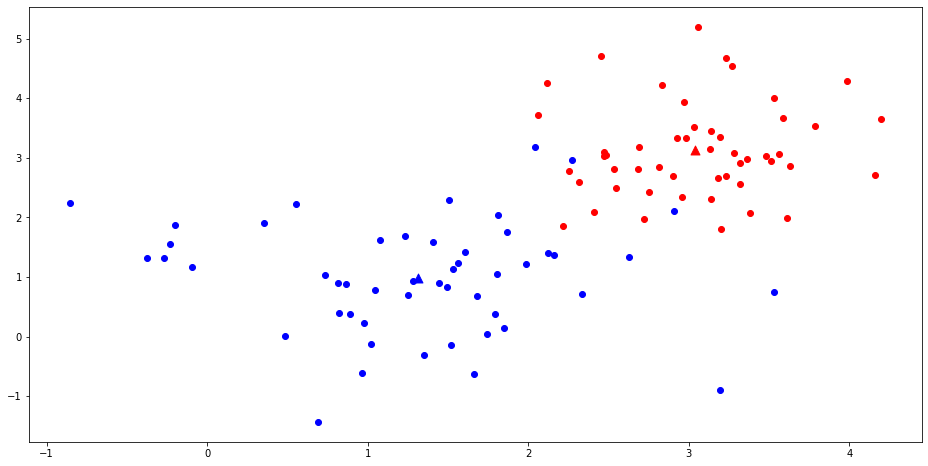

In [ ]:
# Lets plot the x_p points, and the x_m points
# on the same scatter plot with 2 different colors
# we will also plot their means. x_p[:,0] is the
# first row of x_p and x_p[:,1] is the second row
# of x_p. s is used to indicate the marker size
# plt allows us to add as many scatter plots as we
# want to the same plot before plotting
plt.figure(figsize=(16,8));
# Positive points, (0th) row is x, (1st) row is y
plt.scatter(x_p[:,0],x_p[:,1],color='r');
# Negative points
plt.scatter(x_m[:,0],x_m[:,1],color='b');
# Positive mean plotted as a triangle
plt.scatter(np.mean(x_p[:,0]),np.mean(x_p[:,1]),color='r',marker='^',s=80);
# Negative mean plotted as a triangle
plt.scatter(np.mean(x_m[:,0]),np.mean(x_m[:,1]),color='b',marker='^',s=80)
plt.show()

In [ ]:
# Set the kernel function to be whatever we choose
#in this case the linear kernel
#k = k1v   #linear
# in this case the gaussian kernel
k = k5v   #gaussian
#k = k2v   #affine
#k = k3v  #quadratic
#k = k4v #d order kernel
#k = k6v #hyperbolic tan

In [ ]:
# Compute the classifier
k_mm = k(x_m,x_m);
k_pp = k(x_p,x_p);
b = (np.sum(k_mm)/(n_m*n_m)-np.sum(k_pp)/(n_p*n_p))/2
alpha = np.concatenate((np.ones(n_p)/n_p,-np.ones(n_m)/n_m))

In [ ]:
def weight_update(y_labels,X_features):
    weight = np.zeros((len(X_features[0]), len(X_features)))             #2 x 100 for X
    weight[:,0:1] = y_labels[0] * X_features[0:1,:].T             #row vector
    y_labels = np.reshape(y_labels, (len(y_labels),1))            #needs to be a vector   #column vector
    n = len(X_features)

    for i in range(1, n):
        if (y_labels[i,:] * k(np.sum(weight).T,X_features[i:i+1,:])) < 0:
            weight[:,i:i+1] = y_labels[i,:] * np.transpose(X_features[i:i+1,:])

        else:
            weight[:,i:i+1] = np.array([[0],[0]])

    return weight

In [ ]:
#alpha update
def alpha_update(y_labels,X_features):
    alpha = np.zeros((1, len(X_features)))                          # 1 x 100
    weight = np.zeros((len(X_features[0]), len(X_features)))             #2 x 100 for X
    weight[:,0:1] = y_labels[0] * X_features[0:1,:].T
    y_labels = np.reshape(y_labels, (len(y_labels),1))  #needs to be a vector   #column vector
    n = len(X_features)
    alpha[:,0:1] = y_labels[0]

    for i in range(1, n):
        if (y_labels[i,:] * k(np.atleast_2d(np.sum(weight,axis=1).T),np.array(X_features[i:i+1,:]))) < 0:
            alpha[:,i:i+1] = y_labels[i,:]
            weight[:,i:i+1] = y_labels[i,:] * np.transpose(X_features[i:i+1,:])
        else:
            weight[:,i:i+1] = np.array([[0],[0]])

    return alpha, weight

In [ ]:
a,b = alpha_update(y,X)
print(a)

[[ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -1. -1. -1. -1.
  -1. -1. -1. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]


In [ ]:
alpha1 = np.zeros((len(y),1))
alpha1[0,:] = y[0]
for j in range(1,len(y)):
    w = np.sum(alpha1[0:j]*X[0:j,:], axis = 0)    #if alpha is zero due to no update, then the next j'th w is zero
    if y[j]*w @ X[j,:] < 0:
        alpha1[j,:] = y[j]

(101, 101)


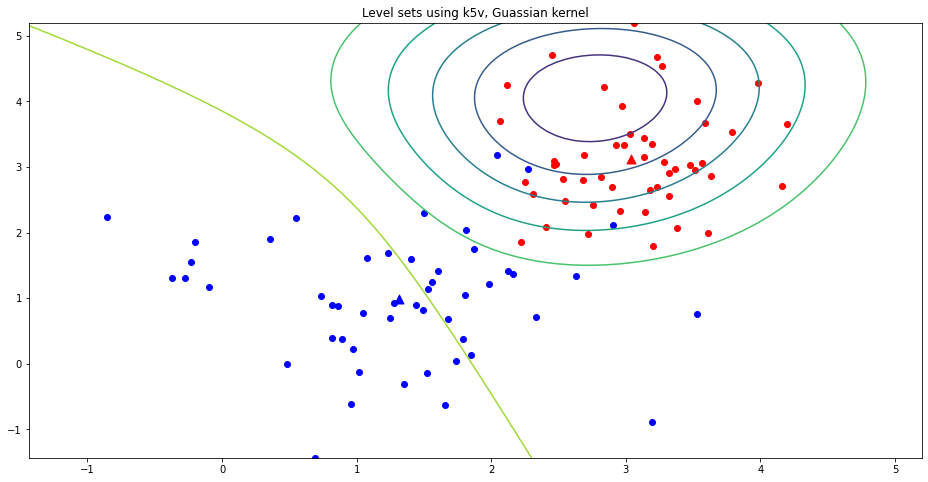

In [ ]:
# Evaluate the classifier on a grid of points. Lets start
# by defining a matrix that contains our grid of points. Since
# our kernel functions are all vectorized we will do this
# all in a vectorized way. Our grid will be 101 by 101, so
# it will have 10,201 points, so we will need to do everything
# in a vectorized way to do it efficiently. Our test set will
# be 10,201 x 2.
g_n = 100
x_min = np.min(X);  #X is a 80 x 2,, np.min(X) is smallest number in thre
x_max = np.max(X);  #X is a 80 x 2,, np.max(X) is largest number in thre

# creates a sequence of numbers from x_min to x_max that is evenly
# spaced and contains floor(g_n/2)*2+1 points. Try to see what I did
# here. n//2 is integer division by 2 (floor(n/2)). Range(a,b) makes a
# list of integers from a to be including a and excluding b incrementing
# by 1. The rest of the mathematics is there to scale and shift this list
# to go from x_min to x_max
g = np.array(range(-g_n//2,g_n//2+1))/(g_n//2)*(x_max-x_min)/2+x_max/2+x_min/2;
# Creates our grid points.
grid = np.concatenate(((np.ones(len(g))*g[0]).reshape(len(g),1),g.reshape(len(g),1)),1);
for i in range(1,len(g)):
    temp = np.concatenate(((np.ones(len(g))*g[i]).reshape(len(g),1),g.reshape(len(g),1)),1);
    grid = np.concatenate((grid,temp));
# Compute the Gram matrix for our gridpoints
K = k(grid,X)
#print(K.shape)
# Computes the classifications of each of our 10201 grid points
# and changes the shape from a 10201D vector to a 101 x 101 matrix
# We also have to take the transpose of the matrix to be consistent
# with the data.

# With using our kernalized perceptron
# learned alpha



#C = (np.dot(K,(alpha1))).reshape((g_n//2)*2+1,(g_n//2)*2+1).T
#plt.figure(figsize=(16,8))

a, b = alpha_update(y,X)
C = (np.dot(K,(a.T))).reshape((g_n//2)*2+1,(g_n//2)*2+1).T
plt.figure(figsize=(16,8))

# I need to pull the alphas out to make sure that alpha goes in here like below
#print((np.dot(K,weight_update(y,X).T).shape))
#print(weight_update(y,X).shape)


#Old function
#C = (np.dot(K,alpha)+b).reshape((g_n//2)*2+1,(g_n//2)*2+1).T
#plt.figure(figsize=(16,8))
#print((np.dot(K,alpha)+b).shape)
#print(alpha.shape)

# Increase level to increase the number of contours, use contourf to
# get a contour plot with filled in color, and contour for a plot with
# just contour lines
#plt.contour(g,g,C,levels=40)
plt.contour(g,g,C)
print(np.shape(C))
# Positive points, (0th) row is x, (1st) row is y
plt.scatter(x_p[:,0],x_p[:,1],color='r');
# Negative points
plt.scatter(x_m[:,0],x_m[:,1],color='b');
# Positive mean plotted as a triangle
plt.scatter(np.mean(x_p[:,0]),np.mean(x_p[:,1]),color='r',marker='^',s=80);
# Negative mean plotted as a triangle
plt.scatter(np.mean(x_m[:,0]),np.mean(x_m[:,1]),color='b',marker='^',s=80)
plt.title('Level sets using k5v, Guassian kernel')
plt.show()

In [ ]:
#alpha_update(T_y,T_x)

In [ ]:
alpha_update(y,X)

(array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -1., -1.,
         -1., -1., -1., -1., -1., -1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]]),
 array([[ 0.55287144,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.    

In [ ]:
x_min
x_max

5.198207909913876

In [ ]:
print(X[0:5,:])
print(X.shape)
print(y[0:5])
print(y.shape)
print(X[1:2,:])

[[ 0.55287144  2.2245077 ]
 [ 1.40349164  1.59357852]
 [-0.09491185  1.16938243]
 [ 1.74055645  0.0462994 ]
 [ 0.73378149  1.03261455]]
(100, 2)
[1. 1. 1. 1. 1.]
(100,)
[[1.40349164 1.59357852]]


In [ ]:
w = y[0] * np.transpose(X[0:1,:])
w.shape

(2, 1)

In [ ]:
w_test = np.zeros((len(X[0]),1))
w_test.shape

(2, 1)

In [ ]:
len(X[0])
print(y.shape)

(100,)


In [ ]:
#perceptron algorithm
# initialize w
w = np.zeros((len(X[0]), 1))
w[:,0] = y[0] * X[0:1,:]
y = np.reshape(y, (len(y),1))

for i in range(1, n):
    if (y[i,:] * k(w.T,X[i:i+1,:])) < 0:
    #if (y[i,:] * np.dot(np.transpose(w),np.transpose(X[i:i+1,:]))) < 0:
        w += y[i,:] * np.transpose(X[i:i+1,:])
    else:
        w == w
#w[:,0:2]
#w.shape

In [ ]:
w

array([[-21.26817729],
       [-29.08409611]])

In [ ]:
T_x = np.array([
    [8, 8], #1
    [8, 7], #2
    [7, 8], #3
    [2, 2], #4
    [2, 1], #5
    [1, 2]
])
T_y = np.array([
    [1],
    [1],
    [1],
    [-1],
    [-1],
    [-1]])

In [ ]:
#perceptron algorithm
# initialize alpha
w_T = np.zeros((len(T_x[0]), 1))
w_T[:,0] = T_y[0] * T_x[0:1,:]
#y = np.reshape(y, (len(y),1))
m = 6
for i in range(1, m):
    if (T_y[i,:] * k(w_T.T,T_x[i:i+1,:])) < 0:
    #if (y[i,:] * np.dot(np.transpose(w),np.transpose(X[i:i+1,:]))) < 0:
        w_T += T_y[i,:] * np.transpose(T_x[i:i+1,:])
        w_T[:,i] = w_T
        print(w_T.shape)
    else:
        w_T[:,i] = np.array([[0,0]])
#w[:,0:2]
#w.shape

IndexError: index 1 is out of bounds for axis 1 with size 1

In [ ]:
np.array([[0],[0]]).shape

In [ ]:
np.array([[0],[0]])

In [ ]:
w_T

In [ ]:
print(X.shape)
print(len(X))
print(len(X[0]))
print(X[0:2,:])

In [ ]:
def weight_update(y_labels,X_features):
    weight = np.zeros((len(X_features[0]), len(X_features)))             #2 x 100 for X
    weight[:,0:1] = y_labels[0] * X_features[0:1,:].T                    #row vector
    #print(weight)
    y_labels = np.reshape(y_labels, (len(y_labels),1))  #needs to be a vector   #column vector
    n = len(X_features)

    for i in range(1, n):
        if (y_labels[i,:] * k(np.sum(weight,axis=1).T,X_features[i:i+1,:])) < 0:
        #if (y[i,:] * np.dot(np.transpose(w),np.transpose(X[i:i+1,:]))) < 0:
            weight[:,i:i+1] = y_labels[i,:] * np.transpose(X_features[i:i+1,:])
            #print(weight)
        else:
            weight[:,i:i+1] = np.array([[0],[0]])
            #print(weight)
    return weight


In [ ]:
print(weight_update(T_y,T_x))
print(np.sum(weight_update(T_y,T_x),axis=1))

In [ ]:
print(weight_update(y,X).shape)
print(np.sum(weight_update(y,X),axis=1))

In [ ]:
#def f(x):
#    return np.sign((alpha @ k(X,x)) + b)

In [ ]:
print(T_x[0:1,:])

In [ ]:
weight = np.zeros((len(T_x[0]), len(T_x)))
print(weight)
weight[:,0:1] = T_y[0] * T_x[0:1,:].T
print(weight) #row vector
print(T_x[0:1,:].shape)
print(np.sum(weight,axis=1))            #row vector
k(np.sum(weight,axis=1).T,T_x[1:2,:])   #row.T, column

In [ ]:
w

In [ ]:
w

In [ ]:
print(np.transpose(X[1:2,:]))
print(y[1,:]*np.transpose(X[1:2,:]) + w)
w.shape

In [ ]:
np.dot(np.transpose(w),np.transpose(X[1:2,:]))

In [ ]:
#w[:,0] = y[0] * X[0:1,:]
#print(w[:,0])
X[99:100,:]

In [ ]:
y[0] * X[0:1,:]

In [ ]:
v = np.zeros((len(X[0]), 1))

In [ ]:
v[:,0:1]
v.shape